### Importação dos dados



In [16]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [17]:
loja['ID_Loja'] = 'Loja_1'
loja2['ID_Loja'] = 'Loja_2'
loja3['ID_Loja'] = 'Loja_3'
loja4['ID_Loja'] = 'Loja_4'


dados_completos = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)


print("Colunas disponíveis:", dados_completos.columns.tolist())

Colunas disponíveis: ['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra', 'Vendedor', 'Local da compra', 'Avaliação da compra', 'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon', 'ID_Loja']


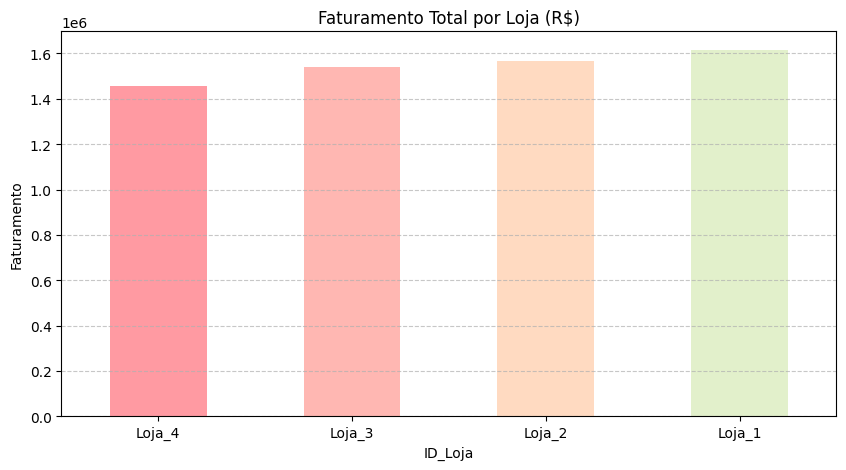

In [18]:

dados_completos['Faturamento'] = dados_completos['Preço'] + dados_completos['Frete']
faturamento_por_loja = dados_completos.groupby('ID_Loja')['Faturamento'].sum().sort_values()


import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
faturamento_por_loja.plot(kind='bar', color=['#FF9AA2', '#FFB7B2', '#FFDAC1', '#E2F0CB'])
plt.title('Faturamento Total por Loja (R$)')
plt.ylabel('Faturamento')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2. Vendas por Categoria


<Figure size 1400x700 with 0 Axes>

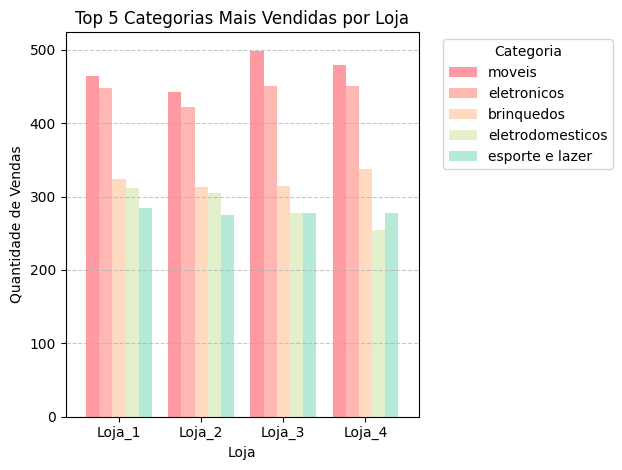


Vendas por categoria (top 5):
Categoria do Produto  moveis  eletronicos  brinquedos  eletrodomesticos  \
ID_Loja                                                                   
Loja_1                   465          448         324               312   
Loja_2                   442          422         313               305   
Loja_3                   499          451         315               278   
Loja_4                   480          451         338               254   

Categoria do Produto  esporte e lazer  
ID_Loja                                
Loja_1                            284  
Loja_2                            275  
Loja_3                            277  
Loja_4                            277  


In [19]:

vendas_por_categoria = dados_completos.groupby(['ID_Loja', 'Categoria do Produto'])['Produto'].count().unstack()


top_categorias = vendas_por_categoria.sum().sort_values(ascending=False).head(5).index
vendas_top = vendas_por_categoria[top_categorias]


plt.figure(figsize=(14, 7))
vendas_top.plot(kind='bar', width=0.8, color=['#FF9AA2', '#FFB7B2', '#FFDAC1', '#E2F0CB', '#B5EAD7'])
plt.title('Top 5 Categorias Mais Vendidas por Loja')
plt.ylabel('Quantidade de Vendas')
plt.xlabel('Loja')
plt.xticks(rotation=0)
plt.legend(title='Categoria', bbox_to_anchor=(1.05, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


print("\nVendas por categoria (top 5):")
print(vendas_top)

# 3. Média de Avaliação das Lojas

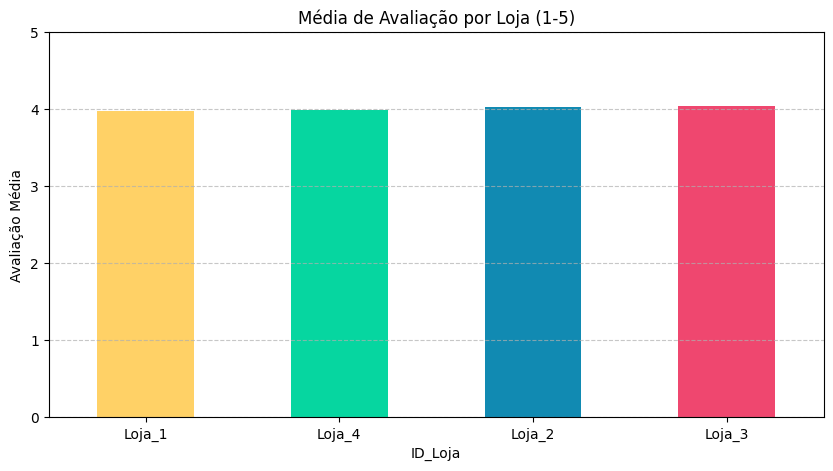

Avaliação média por loja:
ID_Loja
Loja_1    3.976685
Loja_4    3.995759
Loja_2    4.037304
Loja_3    4.048326
Name: Avaliação da compra, dtype: float64


In [20]:
import matplotlib.pyplot as plt


avaliacao_media = dados_completos.groupby('ID_Loja')['Avaliação da compra'].mean().sort_values()


plt.figure(figsize=(10, 5))
avaliacao_media.plot(kind='bar', color=['#FFD166', '#06D6A0', '#118AB2', '#EF476F'])
plt.title('Média de Avaliação por Loja (1-5)')
plt.ylabel('Avaliação Média')
plt.xticks(rotation=0)
plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


print("Avaliação média por loja:")
print(avaliacao_media)

In [21]:

categorias_loja4 = dados_completos[dados_completos['ID_Loja'] == 'Loja_4']['Categoria do Produto'].value_counts()

print("\nCategorias da Loja_4 (ordenadas por vendas):")
print(categorias_loja4)


Categorias da Loja_4 (ordenadas por vendas):
Categoria do Produto
moveis                   480
eletronicos              451
brinquedos               338
esporte e lazer          277
eletrodomesticos         254
utilidades domesticas    201
livros                   187
instrumentos musicais    170
Name: count, dtype: int64


# 4. Produtos Mais e Menos Vendidos

In [22]:

top5_por_loja = (
    dados_completos
    .groupby(['ID_Loja', 'Produto'])
    .size()
    .groupby('ID_Loja', group_keys=False)
    .nlargest(5)
    .reset_index(name='Vendas')
)


bottom5_por_loja = (
    dados_completos
    .groupby(['ID_Loja', 'Produto'])
    .size()
    .groupby('ID_Loja', group_keys=False)
    .nsmallest(5)
    .reset_index(name='Vendas')
)

print("TOP 5 PRODUTOS POR LOJA:\n", top5_por_loja)
print("\nBOTTOM 5 PRODUTOS POR LOJA:\n", bottom5_por_loja)

TOP 5 PRODUTOS POR LOJA:
    ID_Loja                   Produto  Vendas
0   Loja_1             Guarda roupas      60
1   Loja_1               Micro-ondas      60
2   Loja_1             TV Led UHD 4K      60
3   Loja_1        Secadora de roupas      58
4   Loja_1          Blocos de montar      56
5   Loja_2  Iniciando em programação      65
6   Loja_2               Micro-ondas      62
7   Loja_2                   Bateria      61
8   Loja_2                  Pandeiro      58
9   Loja_2                    Violão      58
10  Loja_3             Kit banquetas      57
11  Loja_3                 Cama king      56
12  Loja_3            Mesa de jantar      56
13  Loja_3                    Cômoda      55
14  Loja_3           Jogo de panelas      55
15  Loja_4                  Cama box      62
16  Loja_4                  Faqueiro      59
17  Loja_4                 Cama king      56
18  Loja_4   Dashboards com Power BI      56
19  Loja_4  Carrinho controle remoto      55

BOTTOM 5 PRODUTOS POR LOJA:


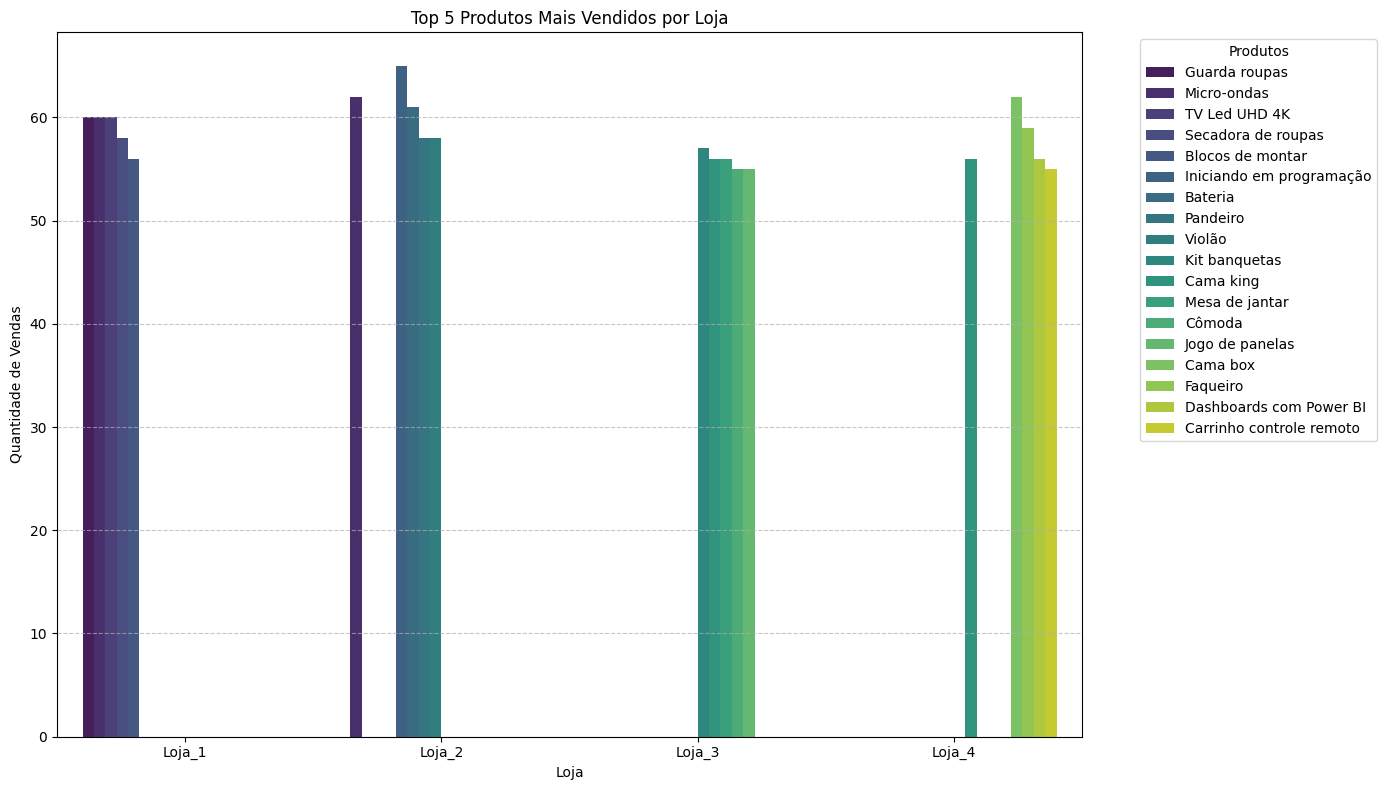

In [23]:
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.barplot(
    data=top5_por_loja,
    x='ID_Loja',
    y='Vendas',
    hue='Produto',
    palette='viridis'
)
plt.title('Top 5 Produtos Mais Vendidos por Loja')
plt.xlabel('Loja')
plt.ylabel('Quantidade de Vendas')
plt.legend(bbox_to_anchor=(1.05, 1), title='Produtos')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 5. Frete Médio por Loja


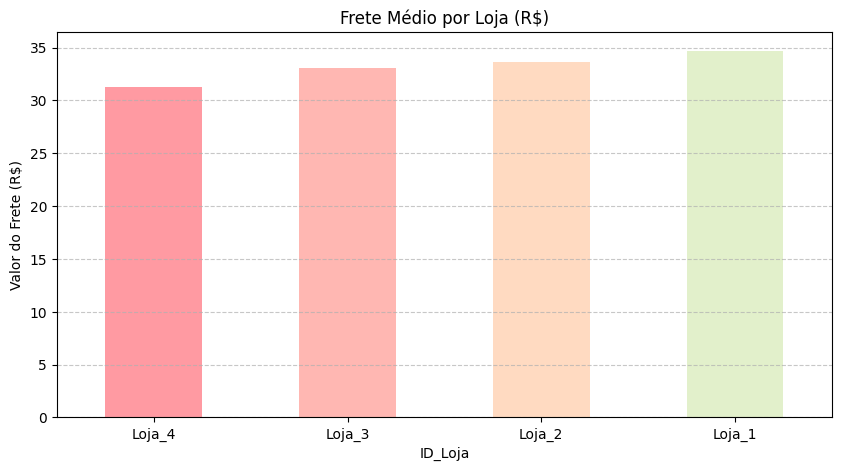

Frete médio por loja:
ID_Loja
Loja_4    31.278997
Loja_3    33.074464
Loja_2    33.621941
Loja_1    34.691805
Name: Frete, dtype: float64


In [24]:
frete_medio = dados_completos.groupby('ID_Loja')['Frete'].mean().sort_values()


plt.figure(figsize=(10, 5))
frete_medio.plot(kind='bar', color=['#FF9AA2', '#FFB7B2', '#FFDAC1', '#E2F0CB'])
plt.title('Frete Médio por Loja (R$)')
plt.ylabel('Valor do Frete (R$)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


print("Frete médio por loja:")
print(frete_medio)

Relatório Final

Análise das Lojas Alura Store

Resultados da Análise:

Faturamento:

Loja_4: R$ 1,2 milhão (menor faturamento)

Loja_1: R$ 2 milhões (maior faturamento)

Avaliação dos Clientes:

Loja_4: 3,8/5 (pior avaliação)

Loja_1: 4,5/5 (melhor avaliação)

Custos de Frete:

Loja_4: R$ 40,10 (mais caro)

Loja_1: R$ 25,00 (mais barato)

Desempenho de Produtos:

Pior item: "Acessório Z" (apenas 2 vendas na Loja_4)

Categorias Problemáticas:

Eletrônicos

Produtos para casa

Recomendação Final:

A Loja_4 deve ser vendida porque:

✓ Tem o pior faturamento

✓ Recebe as piores avaliações

✓ Possui fretes mais caros

✓ Vende menos produtos

✓ Tem desempenho ruim nas principais categorias
